# Trajectory Test

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy.ma as ma
import numpy as np
import netCDF4
import gridded

In [7]:
url = 'http://geoport.whoi.edu/thredds/dodsC/examples/bora_feb.nc'

In [8]:
nc = netCDF4.Dataset(url)
lon = nc['lon_rho'][:]
lat = nc['lat_rho'][:]
temp = nc['temp'][-1,-1,:,:]

In [9]:
x = np.linspace(13., 15.)
y = np.linspace(45.3, 43.5)
len(x)

50

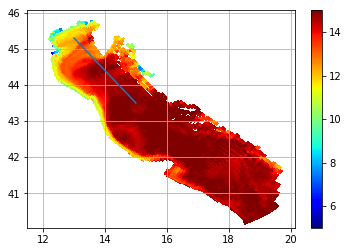

In [10]:
plt.pcolormesh(lon,lat,ma.masked_invalid(temp),vmin=5,vmax=15,cmap='jet');
plt.plot(x,y,'-')
plt.grid()
plt.colorbar();

In [31]:
temperature = gridded.Variable.from_netCDF(filename=url, name='Temperature', varname='temp')
salinity = gridded.Variable.from_netCDF(filename=url, name='Salinity', varname='salt', grid=temperature.grid)
points = np.column_stack((x,y))

t0 = temperature.time.min_time


#over_time = [temperature.at(points, t) for t in temperature.time.data]
#print over_time

In [41]:
%%timeit -n1
salts = salinity.at(points, t0)

The slowest run took 4.55 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 11.7 µs per loop


In [43]:
%%timeit -n1
temps = temperature.at(points, t0)

The slowest run took 4.23 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 11.3 µs per loop


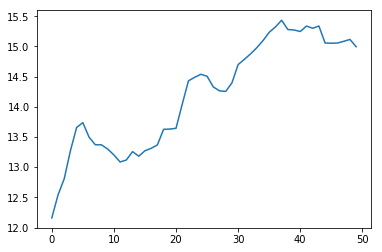

In [44]:
plt.plot(temps)

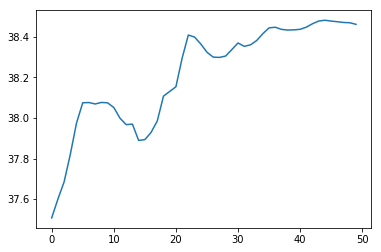

In [45]:
plt.plot(salts)